# STATISTICS Applied to data science

## Exercises PART 1: Descriptive statistics and data exploration

Employing descriptive statistics is one of the main steps of the POC stage (proof-of-concept) and extremely helpful during model evaluation.  
A sound knowledge of statistics will help you design your machine learning experiments and interpret the results easily.   
In this notebook you'll find some common routines for descriptive statistics in Python, and exercises about data transformation and scaling. 

![Image](../images/data_1.jpg)

### Libraries and configs

In [29]:
import numpy as np
from numpy import random
import pandas as pd
from numpy.random import seed, randn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5)
#%matplotlib inline

from scipy import stats

# jupyter lab configs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# precision options
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%precision 4
np.set_printoptions(precision=4, suppress=True)

'%.4f'

# Exercise 1 - Write your own summary statistics and descriptors

Implement code for the functions below. In each function, make sure you call the function written before. E.g., in `my_rmse()` use the values returned by `my_mse()`. The aim of this exercise is just to understand how these diferent metrics are related, and which aspect of the data they are representing.   

**You can use the map below to see the relationships between metrics and then plan how to structure your functions** 

![Image](../images/map.png)

In [30]:
def my_mean(x):
    if len(x)>0:
        return sum(x)/len(x)

def my_sum_squares():
    pass

def my_mse():
    # mean squared error
    pass

def my_rmse():
    # rooted mean squared error
    pass

def my_variance():
    pass

def my_std_dev():
    pass

def my_std_error():
    pass

def my_confidence_95():
    pass
    
def my_covariance():
    pass

def my_coeficient_variation():
    pass

### Make sure it works!! In Python use `assert`

In [31]:
x = random.randint(500, size=(32))
assert my_mean(x) == np.mean(x)

---

# Exercise 2. Practice data description and summarization with pandas

### Here's a collection of `pandas` functions I find most useful during the data exploration stage:
* `.describe()`  and `.describe(include=np.object)` 
* `.info()`
* `.unique()` and `.nunique()`
* `.count_values()`
* `.group_by().agg()`
* `.pd.cut()` and `pd.qcut()` for binning continuous vars into discrete

In [32]:
# load a dataset
from sklearn.datasets import load_boston
dt = load_boston(return_X_y=False)

BOSTON DATASET  
**TARGET**  
`MEDV` Median value of owner-occupied homes in thousands

**POSSIBLE FACTORS**  
`CRIM` per capita crime rate by town    
`ZN` proportion of residential land zoned for lots over 25,000 sq.ft.    
`INDUS` proportion of non-retail business acres per town  
`CHAS` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)   
`NOX` nitric oxides concentration (parts per 10 million)   
`RM` average number of rooms per dwelling      
`AGE` proportion of owner-occupied units built prior to 1940    
`DIS` weighted distances to five Boston employment centres       
`RAD` index of accessibility to radial highways    
`TAX` full-value property-tax rate per $10,000     
`PTRATIO` pupil-teacher ratio by town  

In [33]:
# Load Boston house prices data - CONTINUOUS DATA
dt = load_boston(return_X_y=False)
df = pd.DataFrame(data = np.c_[dt['data'],dt['target']])
df.columns = np.append(dt['feature_names'], 'MED_VALUE')
df.drop(['B', 'LSTAT'], inplace=True, axis=1)

Use pandas `describe()` for continuous data and `describe(include=np.object)` for categorical 

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MED_VALUE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,50.00


Check the number of unique values per variable to understand which are continuous and which are discrete

In [7]:
for c in df.columns:
    print(c, 'has',  df[c].nunique(), 'unique values')

CRIM has 504 unique values
ZN has 26 unique values
INDUS has 76 unique values
CHAS has 2 unique values
NOX has 81 unique values
RM has 446 unique values
AGE has 356 unique values
DIS has 412 unique values
RAD has 9 unique values
TAX has 66 unique values
PTRATIO has 46 unique values
MED_VALUE has 229 unique values


Look at the table above and pay attention to the continuous variables you identified.   
Just looking at the relationship between the **mean** and **std**, which variables seem to be normally distributed?

Which seem to be not normally distributed?

<AxesSubplot:ylabel='Frequency'>

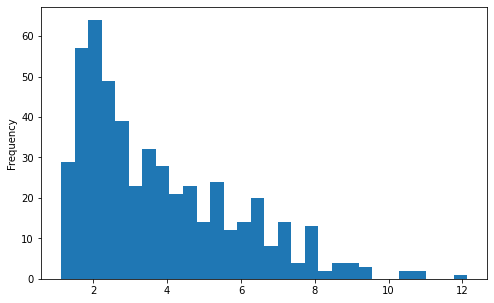

In [8]:
df.DIS.plot.hist(bins=30)

Let's create some categories in the data using `pd.cut()`.     
Check the variable `NOX` that indicates a measure of pollution.    
How many categories could we extract from this data?

<AxesSubplot:ylabel='Frequency'>

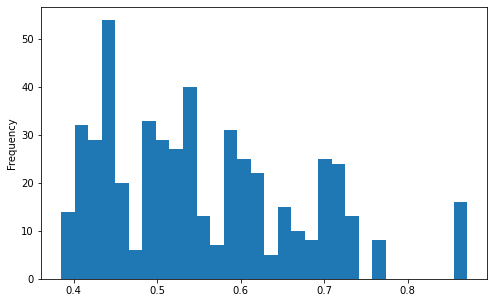

In [9]:
df.NOX.plot.hist(bins=30)

In [10]:
bins = [0, 0.48, 0.58, 0.68, 0.78, 1]
labels = ['level1', 'level2', 'level3', 'level4', 'level5']
df['NOX_categories'] = pd.cut(df['NOX'], labels=labels, bins=bins)
df[['NOX', 'NOX_categories']].head(10)

,NOX,NOX_categories
0,0.54,level2
1,0.47,level1
2,0.47,level1
3,0.46,level1
4,0.46,level1
5,0.46,level1
6,0.52,level2
7,0.52,level2
8,0.52,level2
9,0.52,level2


Overview of the new variable `NOX_categories`

In [11]:
df.NOX_categories.describe(include=np.object)
df.NOX_categories.value_counts()

/var/folders/4v/cg5vs6j958l03gj1_w2prrhc0000gn/T/ipykernel_52756/300391196.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.NOX_categories.describe(include=np.object)


count        506
unique         5
top       level1
freq         155
Name: NOX_categories, dtype: object

level1    155
level2    153
level3    112
level4     70
level5     16
Name: NOX_categories, dtype: int64

---

# Working with probability distributions

Examples using the **stats** module of **scipy**:  

Probability function: `stats.poisson.pmf()`  
Cumulative function: `stats.poisson.cdf()`  
Generate samples: `stats.poisson.rvs(3, size=5000)`  


In [12]:
import math

The number of items per order follows a poisson distribution with lambda = 2.  
What is the probability of having an order with exactly 6 items?

In [13]:
stats.poisson.pmf(6, 2)

0.012029802954365565

The number of clicks per add follows a poisson distribution with lambda = 10.  
What is the probability of having 15 clicks in one add?

In [14]:
stats.poisson.pmf(15, 10)

0.034718069630684245

---

# Three ways to check the distribution of your data

## 1. Use histograms

you can show the frequency as absolute values:

<AxesSubplot:ylabel='Frequency'>

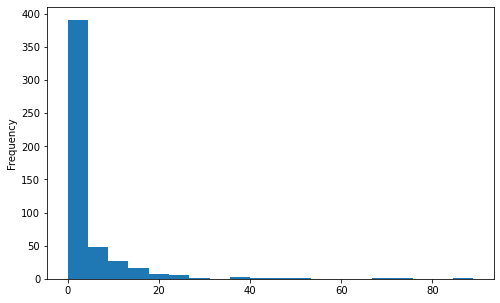

In [15]:
df.CRIM.plot.hist(bins=20)

...of you can show as percentages:

<AxesSubplot:ylabel='Frequency'>

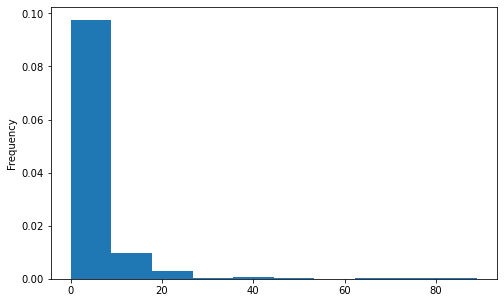

In [16]:
df.CRIM.plot.hist(bins=10, density=True)

## 2. Use hypothesis tests

A common way of testing if a variable has a normal distribution is to use the **Shapiro-Wilk Test**.        
In this test, the null hypothesis is that the data comes from a normal distribution. When **p < 0.05** we can reject this hypothesis  

In [17]:
# import the test from scipy
from scipy.stats import shapiro

# create a variable by drawing from a normal distribution
normal_data = np.random.normal(8, 3.3, 100)
# apply the test, which returns the statistic and the p-value
shapiro(normal_data)

ShapiroResult(statistic=0.9834883213043213, pvalue=0.24590228497982025)

The p-value is > 0.05 (by far), so what do we do? 

**Now repeat the test using one of the dataset's variables:**

Is this variable normally distributed?  
Try it yourself using the other variables in the dataset

In [18]:
shapiro(df.RM)

ShapiroResult(statistic=0.9608717560768127, pvalue=2.4114604757485836e-10)

## 3. Use QQ-plots

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


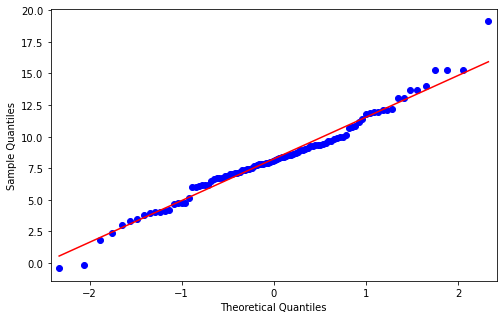

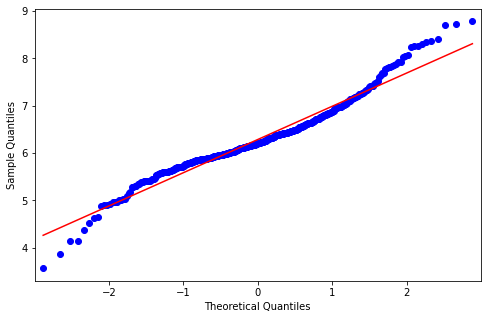

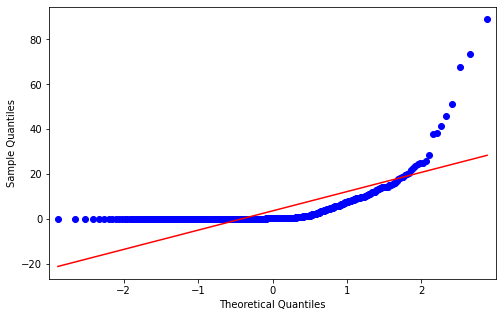

In [19]:
from statsmodels.graphics.gofplots import qqplot

# example of a normally distributed variable
p = qqplot(normal_data, line='s')


# example of a variable approaches normality but has outliers
q = qqplot(df.RM, line='s')

# example of a very not-normally distributed variable
r = qqplot(df.CRIM, line='s')

---

# Data transformations

## The most common procedures are *feature scaling* and *linearization*:

1. `Feature scaling` means you transform the data so all quantitative features are, let's say, *speaking the same language*.   
Common scaling techniques are:
* Min-max (a.k.a. **normalization**)
* z-score (a.k.a. **standardization**)  

Particularly, I always use z-score, and this transformation is also the most common method employed in *unsupervised learning* such as PCA, clustering, etc.

2. `Linearization` will be usually needed to transform the `target`, or `dependent` variable, i. e., what you are trying to model

# Feature scaling (a.k.a. standardization, normalization)

## Z-score transformation 

![Image](../images/zscore.gif)   



You can use `scipy.stats.zscore()` or write your own function, which is way more fun:

In [20]:
def my_z_score(data):
    """ Applies z-score transformation to a vector"""
    return data

In [21]:
# generate some data and check the mean and sd before transformation
data = randn(5)
np.mean(data), np.std(data)

(0.3411024065320758, 0.36417714408153057)

Now check what happens to the mean and std after the z-score transformation:

In [22]:
data_std = my_z_score(data)
np.mean(data_std), np.std(data_std)

(0.3411024065320758, 0.36417714408153057)

# Linearization
## *Dealing with non-gaussian data* 

There's usually four ways of carrying on the analysis if you are working with regression problems and quantitative **target** variables that are not normally-distributed.
1. Look for models that don't need linear relationships in the data (E. g. random forests, boosted trees)
2. Look for models that can handle different distributions, like Poisson or Binomial (a.k.a. Generalized Linear Models)
3. If you are using a hypothesis test, use bootstrapping to generate to generate the null model 
4. Apply transformations (log, sqrt, box-cox)

**Warning!**  

Log-transformation is a common tool in statistics. However, there is a pitfall in using log transformation of your data.  
Especially if you have a wide numerical range in a feature, keep in mind that log will "compress" the data significantly more, and this can prevent the identification of interesting patterns.

In [23]:
# difference betwee the log and sqrt transformation of a "big" value
np.sqrt(34565)
np.log(34565)

# difference betwee the log and sqrt transformation of a "small" value
np.sqrt(107)
np.log(107)

185.91664799043684

10.450596888379366

10.344080432788601

4.672828834461906

The function below plots the diagnostic plots **QQ Plots** for two sets of variables, like raw (unstransformed) and transformed data, for comparison. 

In [24]:
def plot_compare_transformations(raw_data, transformed_data, transformation_used):
    fig = plt.figure(figsize = (18, 7))
    ax1 = fig.add_subplot(211)
    prob = stats.probplot(raw_data, dist=stats.norm, plot=ax1)
    ax1.set_xlabel('')
    ax1.set_title('Probplot against the normal distribution (line) ')
    ax2 = fig.add_subplot(222)
    prob = stats.probplot(transformed_data, dist=stats.norm, plot=ax2)
    ax2.set_title('Probplot after ' + transformation_used + ' transformation')
    #plt.show()

### Example: 
Try **box-cox** (available in **scipy**)

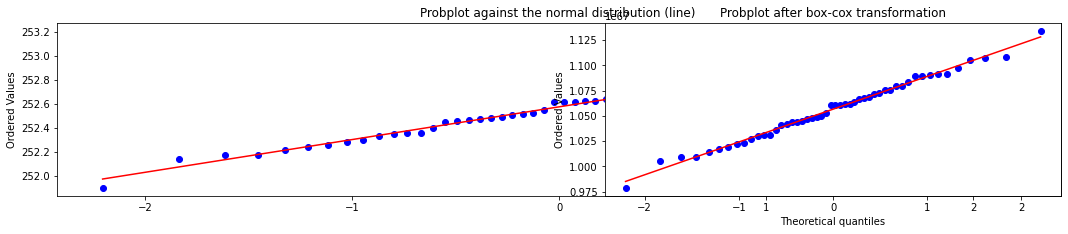

In [25]:
# generate some data with noise
raw_data = stats.loggamma.rvs(14, size=50) + 250

# apply box-cox
transformed_data, _ = stats.boxcox(raw_data)

# plot and compare 
plot_compare_transformations(raw_data, transformed_data, 'box-cox')

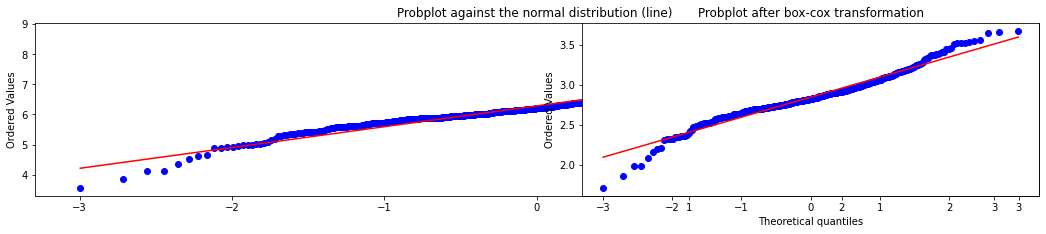

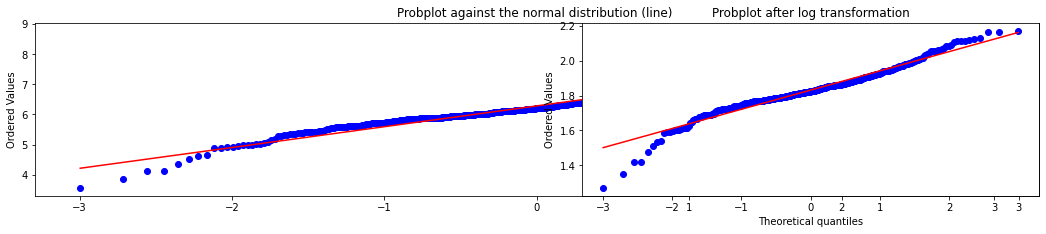

In [26]:
# apply sqrt
transformed_data, _ = stats.boxcox(df.RM)

# plot and compare 
plot_compare_transformations(df.RM, transformed_data, 'box-cox')

# apply sqrt
transformed_data = np.log(df.RM)

# plot and compare 
plot_compare_transformations(df.RM, transformed_data, 'log')

Now let's see the same effect in numbers:

Example with **Shapiro-Wilks's** test:

In [27]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(raw_data)[0],'p-value:', stats.shapiro(raw_data)[1])

Test of normal distribution with Shapiros Test
stat: 0.9931349754333496 p-value: 0.9920463562011719


In [28]:
print('Test of normal distribution with Shapiros Test')
print('stat:', stats.shapiro(transformed_data)[0],'p-value:', stats.shapiro(transformed_data)[1])

Test of normal distribution with Shapiros Test
stat: 0.9593966603279114 p-value: 1.3616532901217226e-10


----

<a href='https://www.freepik.com/vectors/data'>Data vector created by stories - www.freepik.com</a>